### Anomaly Detection in Transactions

In [1]:
import pandas as pd
import numpy as np

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

In [5]:
data = pd.read_csv('artifacts//data_ingestion//Raw_data.csv')

In [6]:
data.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_since_last_transaction,Day_of_week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


In [8]:
data.dtypes

Transaction_ID                  object
Transaction_Amount             float64
Transaction_Volume               int64
Average_Transaction_Amount     float64
Frequency_of_Transactions        int64
Time_since_last_transaction      int64
Day_of_week                     object
Time_of_Day                     object
Age                              int64
Gender                          object
Income                           int64
Account_Type                    object
dtype: object

In [9]:
data.shape

(1000, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,1000.0,1038.122511,283.580055,849.024392,966.028796,1002.118678,1.033144e+03,3.227459e+03
Transaction_Volume,1000.0,2.498000,1.115006,1.000000,1.000000,3.000000,3.000000e+00,4.000000e+00
Average_Transaction_Amount,1000.0,1000.682506,20.632334,939.081423,986.800556,1000.501902,1.015156e+03,1.073154e+03
Frequency_of_Transactions,1000.0,12.078000,4.245225,5.000000,8.000000,12.000000,1.600000e+01,1.900000e+01
Time_Since_Last_Transaction,1000.0,15.341000,8.361258,1.000000,8.000000,16.000000,2.200000e+01,2.900000e+01
Age,1000.0,40.641000,13.819953,18.000000,29.000000,41.000000,5.300000e+01,6.400000e+01
Income,1000.0,894823.839000,345356.222598,300159.000000,591730.750000,887664.500000,1.178102e+06,1.499670e+06


In [18]:
data.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

In [20]:
data.duplicated().sum()

0

In [23]:
data.dtypes

Transaction_ID                  object
Transaction_Amount             float64
Transaction_Volume               int64
Average_Transaction_Amount     float64
Frequency_of_Transactions        int64
Time_Since_Last_Transaction      int64
Day_of_Week                     object
Time_of_Day                     object
Age                              int64
Gender                          object
Income                           int64
Account_Type                    object
dtype: object

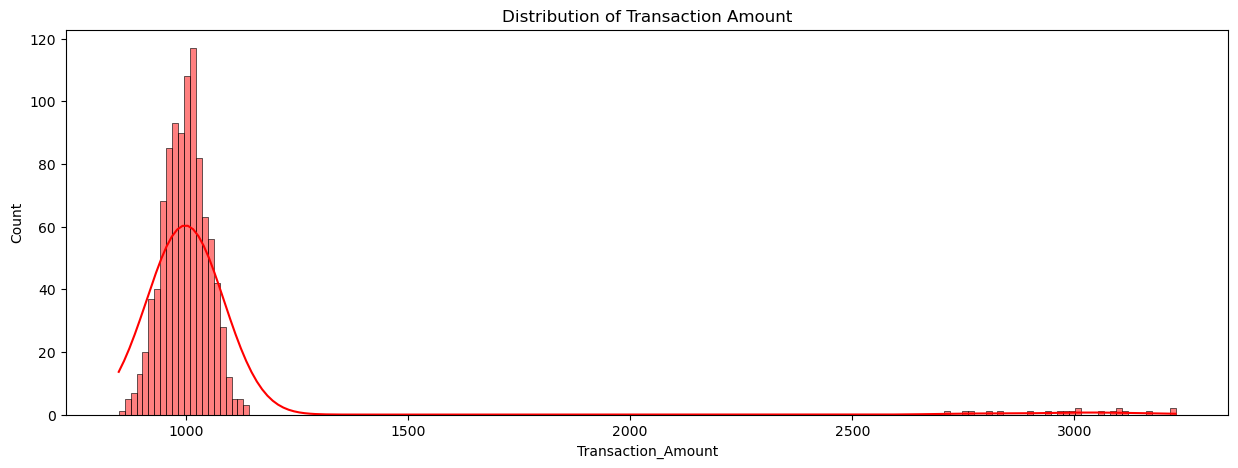

In [37]:
plt.subplots(figsize = (15, 5))
plt.title('Distribution of Transaction Amount')
sns.histplot(data = data, x = 'Transaction_Amount', kde = True, color = 'red')
plt.show()

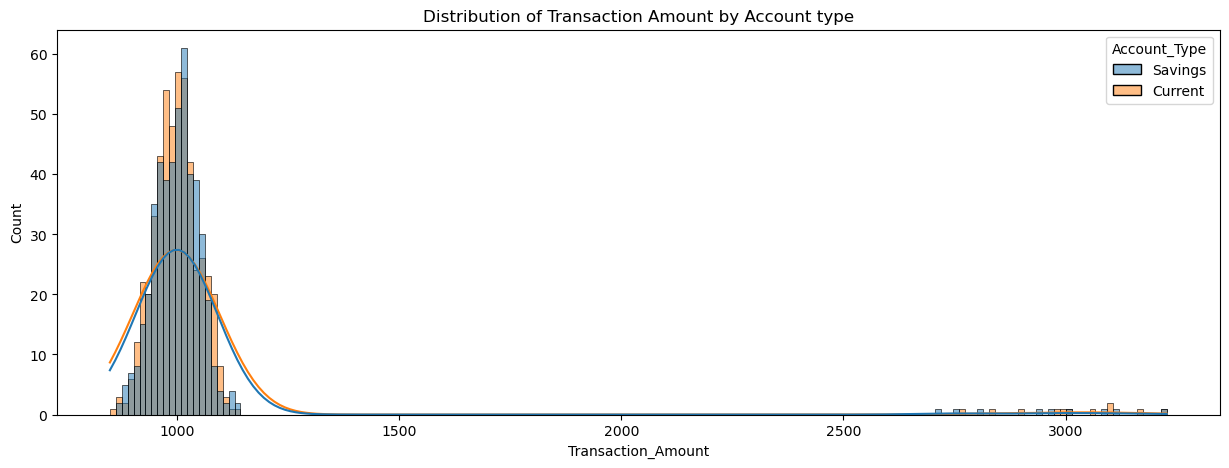

In [39]:
plt.subplots(figsize = (15, 5))
plt.title('Distribution of Transaction Amount by Account type')
sns.histplot(data = data, x = 'Transaction_Amount', kde = True, color = 'red', hue = 'Account_Type')
plt.show()

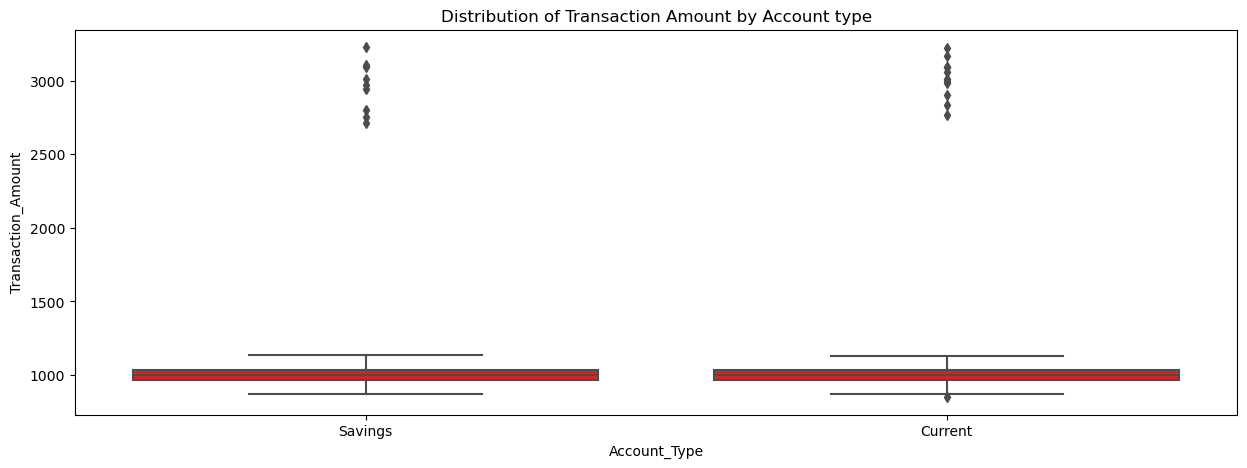

In [47]:
plt.subplots(figsize = (15, 5))
plt.title('Distribution of Transaction Amount by Account type')
sns.boxplot(data = data, y = 'Transaction_Amount', x = 'Account_Type', color = 'red')
plt.show()

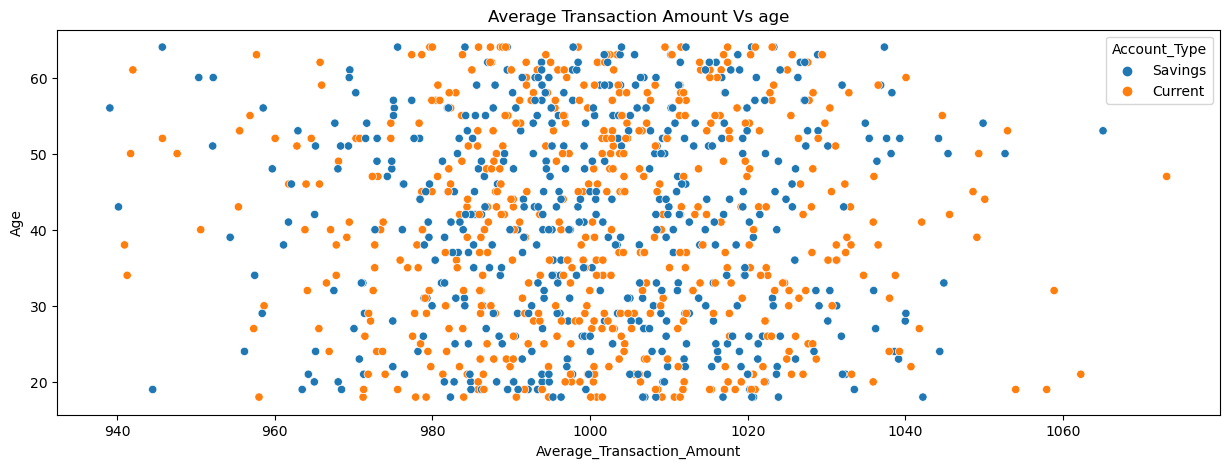

In [53]:
plt.subplots(figsize = (15, 5))
plt.title('Average Transaction Amount Vs age')
sns.scatterplot(data = data, x = 'Average_Transaction_Amount', y = 'Age', hue = 'Account_Type')
plt.show()

#### There’s no difference in the average transaction amount by age

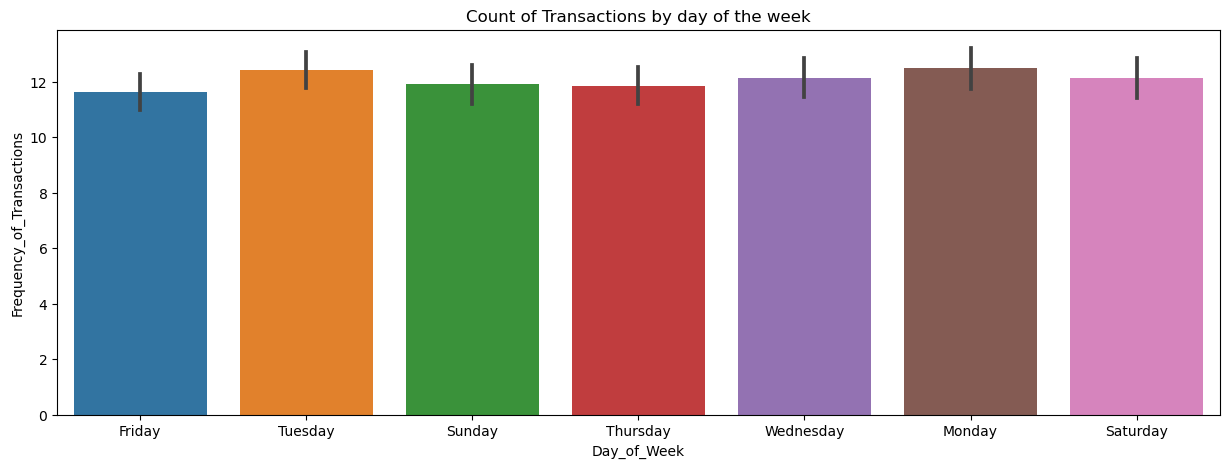

In [60]:
plt.subplots(figsize = (15, 5))
plt.title('Count of Transactions by day of the week')
sns.barplot(data = data, x = 'Day_of_Week', y = 'Frequency_of_Transactions')
plt.show()

In [64]:
correlation = data.corr(numeric_only = True)

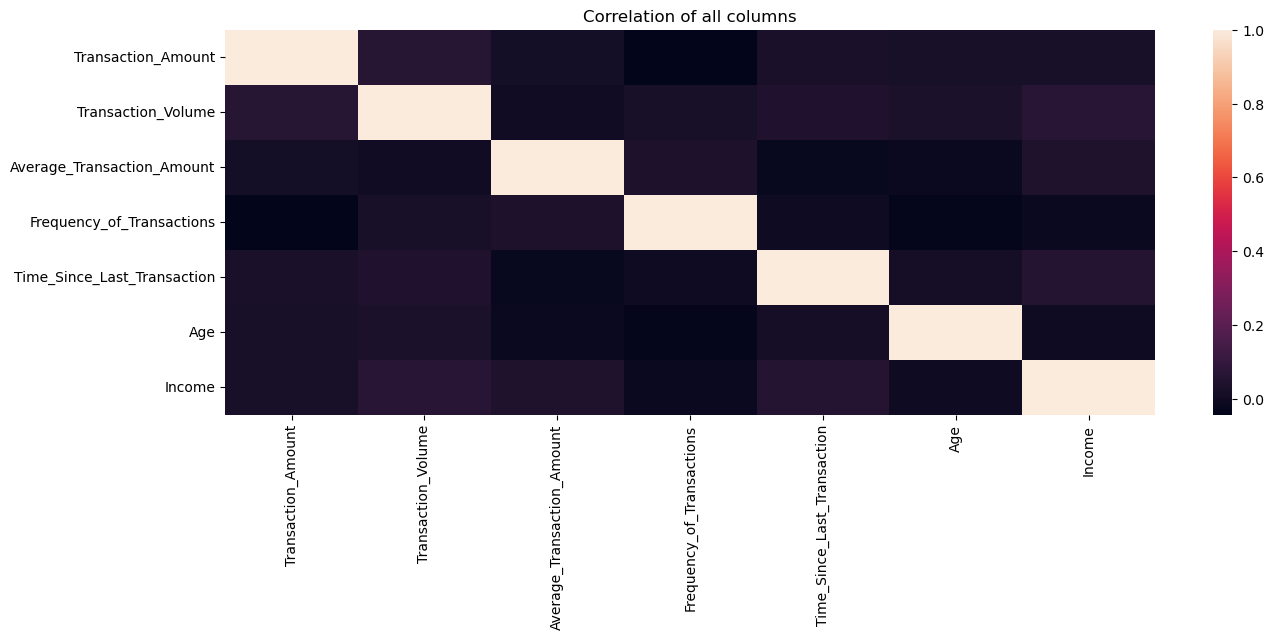

In [68]:
plt.subplots(figsize = (15, 5))
plt.title('Correlation of all columns')
sns.heatmap(correlation)
plt.show()

#### Calculate mean and standard deviation of Transaction Amount

In [71]:
mean_amount = data['Transaction_Amount'].mean()

In [75]:
mean_amount

1038.1225107502053

In [73]:
std_amount = data['Transaction_Amount'].std()

In [77]:
std_amount

283.5800547153556

#### Define the anomaly threshold (2 standard deviations from the mean)

In [80]:
anomaly_threshold = mean_amount + 2*std_amount

In [82]:
anomaly_threshold

1605.2826201809164

#### Flaging anomalies

In [85]:
data['Is_anomaly'] = data['Transaction_Amount'] > anomaly_threshold

In [87]:
data.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Is_anomaly
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings,False
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings,False
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings,False
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings,False
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings,False


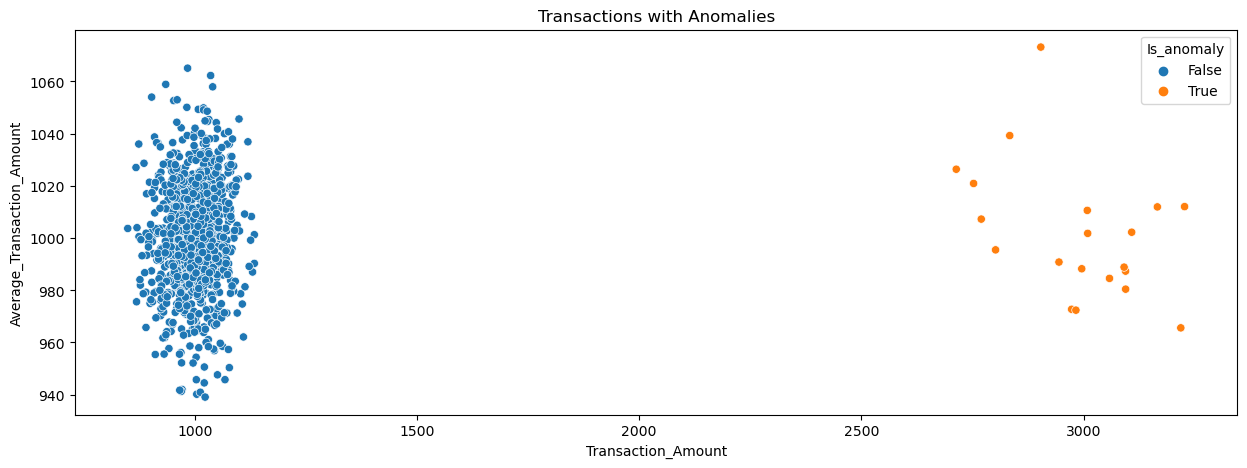

In [89]:
plt.subplots(figsize = (15, 5))
plt.title('Transactions with Anomalies')
sns.scatterplot(data = data, x = 'Transaction_Amount', y = 'Average_Transaction_Amount', hue = 'Is_anomaly')
plt.show()

#### Calculate the number of anomalies

In [92]:
num_anomalies = data['Is_anomaly'].sum()

In [94]:
num_anomalies

20

In [98]:
data['Is_anomaly'].value_counts()

Is_anomaly
False    980
True      20
Name: count, dtype: int64

In [110]:
#anomaly ration

20/1000

0.02

In [112]:
relevant_features = ['Transaction_Amount',
                     'Average_Transaction_Amount',
                     'Frequency_of_Transactions']

In [114]:
X = data[relevant_features]

y = data['Is_anomaly']

In [118]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [122]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

In [141]:
from sklearn.ensemble import IsolationForest

In [143]:
model = IsolationForest(contamination = 0.02)

In [145]:
model.fit(X_train, y_train)

IsolationForest(contamination=0.02)

In [147]:
y_pred = model.predict(X_test)

In [149]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [151]:
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

In [156]:
from sklearn.metrics import classification_report

In [164]:
report = classification_report(y_test, y_pred_binary, target_names = ['Normal', 'Anomaly'])

In [166]:
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

